# Analysing sales Data

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Combine 12 months worth of sales data into one (anual) Dataset

In [2]:
april_data = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
april_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
# get the names of all the files(csv) form the Directory
files = os.listdir('./Sales_Data')
files
#[file for file in os.listdir('./Sales_Data')]

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [4]:
all_files = [file for file in os.listdir('./Sales_Data')]
all_files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [5]:
# loop through the file names ,read them and concat them together
# Empty DataFrame
all_months_data = pd.DataFrame()
for file in all_files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_months_data = pd.concat([all_months_data,df])


all_months_data.to_csv('all_months_data.csv',index=False)   

In [6]:
all_months_data.sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3211,262415,Lightning Charging Cable,1,14.95,10/26/19 10:42,"297 Lake St, San Francisco, CA 94016"
5634,215266,AA Batteries (4-pack),1,3.84,06/03/19 18:47,"982 12th St, New York City, NY 10001"
5713,284259,27in 4K Gaming Monitor,1,389.99,11/01/19 21:19,"125 10th St, Atlanta, GA 30301"
13820,291999,AAA Batteries (4-pack),1,2.99,11/22/19 21:00,"243 Park St, San Francisco, CA 94016"
3101,212867,Lightning Charging Cable,1,14.95,06/04/19 12:59,"942 14th St, Austin, TX 73301"
10968,289274,Google Phone,1,600,11/30/19 08:22,"566 Dogwood St, San Francisco, CA 94016"
648,NaN,NaN,NaN,NaN,NaN,NaN
256,259604,Apple Airpods Headphones,1,150.0,10/04/19 21:57,"62 Hill St, Los Angeles, CA 90001"
3862,240380,Wired Headphones,1,11.99,08/12/19 16:04,"559 Washington St, Seattle, WA 98101"
17031,311943,AA Batteries (4-pack),2,3.84,12/19/19 09:35,"427 Cherry St, San Francisco, CA 94016"


In [7]:
all_data = pd.read_csv('all_months_data.csv')

In [8]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [9]:
all_data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [10]:
# Check the TYPES OF DATA in each Cloumn
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


## Task1 
### What was the best month for sales?
## How much was earned that month?

##### Data Cleanup

In [11]:
# DROP rows with NaN
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.tail()
# rows have all their values as Nan

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185176,NaN,NaN,NaN,NaN,NaN,NaN
185438,NaN,NaN,NaN,NaN,NaN,NaN
186042,NaN,NaN,NaN,NaN,NaN,NaN
186548,NaN,NaN,NaN,NaN,NaN,NaN
186826,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# drop all rows that have all their values as NaN
all_data = all_data.dropna(how="all")


##### Find 'Order Date' values in Order Date Column

In [13]:
# Rows whose values for Order Date is Order Date (no given Date) 
temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [14]:
# set all_data to all rows whose vallue for column Order Date are not Order Date
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [15]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Augment the data with some additional columns

##### Add month column from Date column

In [16]:
all_data['Month'] = all_data['Order Date'].str[0:2]

In [17]:
# OR
#mnth=all_data['Order Date'].str.split('/')
#mnth

In [18]:
# mnth.str.get(0)

In [19]:
all_data.sample(9)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
42298,307014,20in Monitor,1,109.99,12/28/19 09:25,"537 Center St, Dallas, TX 75001",12
71051,144563,Wired Headphones,1,11.99,01/19/19 17:22,"366 Madison St, Portland, OR 97035",01
180408,253185,AA Batteries (4-pack),1,3.84,09/04/19 20:44,"142 9th St, Portland, OR 97035",09
117756,173936,AAA Batteries (4-pack),1,2.99,03/08/19 15:42,"724 Ridge St, Dallas, TX 75001",03
34182,299266,Bose SoundSport Headphones,1,99.99,12/12/19 19:54,"6 8th St, San Francisco, CA 94016",12
123297,196757,Apple Airpods Headphones,1,150,05/07/19 20:50,"554 Johnson St, San Francisco, CA 94016",05
1581,178062,AA Batteries (4-pack),1,3.84,04/21/19 23:19,"274 Sunset St, Portland, OR 97035",04
85735,230995,AAA Batteries (4-pack),3,2.99,07/08/19 20:13,"782 North St, Portland, OR 97035",07
28465,246311,Apple Airpods Headphones,1,150,08/19/19 13:54,"745 Washington St, Los Angeles, CA 90001",08


In [20]:
# Convert month column to intiger
all_data['Month'] = all_data['Month'].astype('int32')

In [21]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


##### Add: Sales Column

In [22]:
# convert columns to required type
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### What was the best month for Sales ?

In [23]:
all_data.groupby('Month').sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


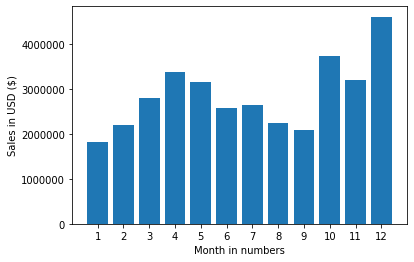

In [24]:
# sales 
sales = all_data.groupby('Month').sum()['Sales']
months = range(1,13)

plt.bar(months,sales)
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month in numbers')
plt.show()

## Q2 What City had the Highest number of Sales

In [25]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [26]:

city_temp = all_data['Purchase Address'].str.split(',')
city_temp

0                    [917 1st St,  Dallas,  TX 75001]
2               [682 Chestnut St,  Boston,  MA 02215]
3            [669 Spruce St,  Los Angeles,  CA 90001]
4            [669 Spruce St,  Los Angeles,  CA 90001]
5               [333 8th St,  Los Angeles,  CA 90001]
                             ...                     
186845     [840 Highland St,  Los Angeles,  CA 90001]
186846    [216 Dogwood St,  San Francisco,  CA 94016]
186847       [220 12th St,  San Francisco,  CA 94016]
186848     [511 Forest St,  San Francisco,  CA 94016]
186849     [250 Meadow St,  San Francisco,  CA 94016]
Name: Purchase Address, Length: 185950, dtype: object

In [27]:
city_temp.str.get(2).str.split(' ').str.get(1)

0         TX
2         MA
3         CA
4         CA
5         CA
          ..
186845    CA
186846    CA
186847    CA
186848    CA
186849    CA
Name: Purchase Address, Length: 185950, dtype: object

In [28]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99


In [29]:
# Using the  APPLY()
"""
lambda is the name of the function
lambda x is the function to be applied to the series
pass in the serie as x 
for every row , split
then get the element at position 1
"""
 #all_data['City'] = all_data['Purchase Address'].apply(lambda x : x.split(',')[1])
# or 
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]
# take both STATE and CITY because  we can instance of portland main portland oregon
all_data['City'] = all_data['Purchase Address'].apply(lambda x :f"{get_city(x)} ({get_state(x)}) ")
all_data


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles (CA)
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco (CA)
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco (CA)


In [30]:
all_data.sample(12)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
107926,164544,AA Batteries (4-pack),1,3.84,03/25/19 16:08,"596 Madison St, Boston, MA 02215",3,3.84,Boston (MA)
180161,252943,Apple Airpods Headphones,1,150.00,09/08/19 16:30,"983 Lake St, San Francisco, CA 94016",9,150.00,San Francisco (CA)
156073,260582,AAA Batteries (4-pack),1,2.99,10/20/19 16:38,"102 Main St, New York City, NY 10001",10,2.99,New York City (NY)
76397,149668,USB-C Charging Cable,1,11.95,01/24/19 13:17,"636 Church St, San Francisco, CA 94016",1,11.95,San Francisco (CA)
43543,308215,Bose SoundSport Headphones,1,99.99,12/01/19 08:44,"756 Maple St, San Francisco, CA 94016",12,99.99,San Francisco (CA)
113920,170269,Apple Airpods Headphones,1,150.00,03/06/19 20:44,"967 5th St, Boston, MA 02215",3,150.00,Boston (MA)
121643,195184,AA Batteries (4-pack),1,3.84,05/13/19 08:38,"410 Lincoln St, Dallas, TX 75001",5,3.84,Dallas (TX)
35614,300630,Vareebadd Phone,1,400.00,12/23/19 14:38,"416 Johnson St, New York City, NY 10001",12,400.00,New York City (NY)
10155,186251,Lightning Charging Cable,1,14.95,04/11/19 07:23,"21 Elm St, San Francisco, CA 94016",4,14.95,San Francisco (CA)
116587,172825,AAA Batteries (4-pack),1,2.99,03/10/19 10:37,"778 Elm St, New York City, NY 10001",3,2.99,New York City (NY)


### What city had the highest number of sales 

In [31]:
sales_by_city = all_data.groupby('City').sum()
sales_by_city

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


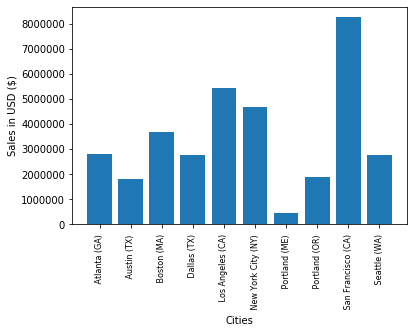

In [32]:
sales = all_data.groupby('City').sum()['Sales']
cities = [city for city,df in all_data.groupby('City')]#all_data['City'].unique()

plt.bar(cities,sales)
plt.xticks(cities,rotation='vertical',size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Cities')
plt.show()

## What time should we display advertisements to Maximize likelyhood of customers buying products

In [33]:
# convert the Order Date column to DateTime format
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [34]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [38]:
# Add an Hour Column
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [39]:
sales_by_hour = all_data.groupby('Hour').sum()
sales_by_hour

,Quantity Ordered,Price Each,Month,Sales,Minute
Hour,,,,,
0,4428,709296.70,27554,713721.27,103596
1,2619,458490.00,16657,460866.88,61807
2,1398,233833.64,8507,234851.44,32508
3,928,144726.42,5904,145757.89,23044
4,937,162058.18,6148,162661.01,26876
5,1493,229621.21,9301,230679.82,42877
6,2810,445000.11,17539,448113.00,80343
7,4556,740568.11,28850,744854.12,127447
8,7002,1185970.62,43626,1192348.97,198135


In [44]:
hours = [hour for hour,df in all_data.groupby('Hour')]
sales = all_data.groupby('Hour').sum()['Sales']
count = all_data.groupby('Hour').count() # number of occurance of orders by hour(for that specific hour)

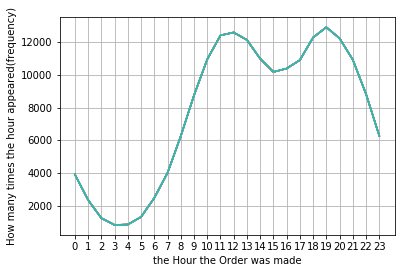

In [50]:
# plot count for every group of hour
# number of  rows by each different hour
# hour 5 appears how many times in the dataframe
# Distribution of the Order Hours
plt.plot(hours,count)
plt.xticks(hours)
plt.xlabel('the Hour the Order was made')
plt.ylabel('How many times the hour appeared(frequency)')
#plt.ylabel('Number of  Orders')
plt.grid()
plt.show()

In [51]:
""" 
peek times people make orders are 11 am (in the morning) & 7pm (after work )
display ads 
    right b4 11am ,  or 12 
    right before 7pm like 6pm 
""" 

' \npeek times people make orders are 11 am (in the morning) & 7pm (after work )\ndisplay ads \n    right b4 11am ,  or 12 \n    right before 7pm like 6pm \n'

### What products are most often sold Together

In [53]:
# product sold together have the same (order Id) and (Shipped to same Purchase Address)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


In [54]:
df = all_data[all_data['Order ID'].duplicated(keep=False)]

In [63]:
df.head(20)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,AAA Batteries (4-pack),2,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco (CA),17,0,"AAA Batteries (4-pack),Google Phone"
33,176586,Google Phone,1,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco (CA),17,0,"AAA Batteries (4-pack),Google Phone"
119,176672,Lightning Charging Cable,1,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City (NY),11,7,"Lightning Charging Cable,USB-C Charging Cable"
120,176672,USB-C Charging Cable,1,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,New York City (NY),11,7,"Lightning Charging Cable,USB-C Charging Cable"


In [65]:

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute,Grouped
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles (CA),19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston (MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."
...,...,...,...,...,...,...,...,...,...,...,...,...
186792,259303,AA Batteries (4-pack),1,3.84,2019-09-20 20:18:00,"106 7th St, Atlanta, GA 30301",9,3.84,Atlanta (GA),20,18,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,Wired Headphones,1,11.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,11.99,Atlanta (GA),0,25,"Wired Headphones,AAA Batteries (4-pack)"
186804,259314,AAA Batteries (4-pack),2,2.99,2019-09-16 00:25:00,"241 Highland St, Atlanta, GA 30301",9,5.98,Atlanta (GA),0,25,"Wired Headphones,AAA Batteries (4-pack)"
186841,259350,Google Phone,1,600.00,2019-09-30 13:49:00,"519 Maple St, San Francisco, CA 94016",9,600.00,San Francisco (CA),13,49,"Google Phone,USB-C Charging Cable"


In [66]:
# Now drop the duplicates
df = df[['Order ID','Grouped']].drop_duplicates()
df

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [67]:
from itertools import combinations
from collections import Counter

In [69]:
# count the pairs(2 items) that occured together 

count = Counter()
for row in df['Grouped']: # loop through the series rows (series is a list)
    row_list = row.split(',') # from a row create a sublist
    count.update(Counter(combinations(row_list,2)))

    
count.most_common(10)
    

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

In [70]:
# OR
for key,value in count.most_common(10):
    print(key,value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


 ### Helps with Promotions

## Which Product sold the most ? Why do you think it Sold the most ?

In [71]:
# sum the quantity Ordered based on the products
product_group = all_data.groupby('Product').sum()
product_group

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Product,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,122252
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789


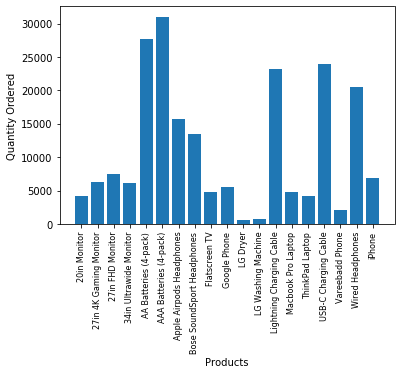

In [76]:
quantity_ordered = all_data.groupby('Product').sum()['Quantity Ordered']
products = [product for product,df in all_data.groupby('Product')]

plt.bar(products,quantity_ordered)
plt.xticks(products,rotation='vertical',size=8)
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.show()

In [77]:
all_data.groupby('Product').mean()

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Product,,,,,,
20in Monitor,1.006828,109.99,7.153377,110.740968,14.329188,29.810290
27in 4K Gaming Monitor,1.002247,389.99,7.133226,390.866382,14.593258,29.587640
27in FHD Monitor,1.005728,149.99,7.001199,150.849141,14.325296,29.299054
34in Ultrawide Monitor,1.002912,379.99,7.005986,381.096588,14.411260,29.684517
AA Batteries (4-pack),1.343004,3.84,7.073820,5.157137,14.498809,29.598046
AAA Batteries (4-pack),1.502689,2.99,7.091226,4.493040,14.404922,29.655201
Apple Airpods Headphones,1.007203,150.00,7.040774,151.080455,14.361309,29.298990
Bose SoundSport Headphones,1.009906,99.99,7.062889,100.980520,14.442402,29.463640
Flatscreen TV,1.003958,300.00,7.130000,301.187500,14.336458,29.747708


In [75]:
prices = all_data.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

### Hypothesis: Correlation between Price and Quantity Ordered 
#### cheap products more will be ordered

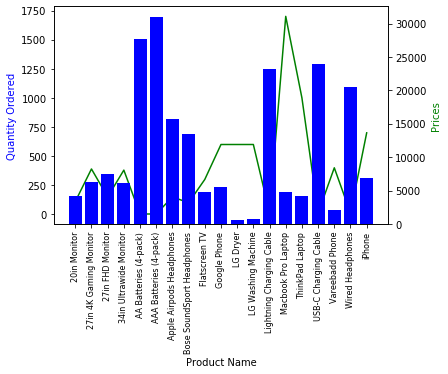

In [79]:
fig,ax1 = plt.subplots()

ax2 = ax1.twinx()
ax2.bar(products,quantity_ordered,color='b') #bar
ax1.plot(products,prices,color='g') # line

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered',color='b')

ax2.set_xlabel('Product Name')
ax2.set_ylabel('Prices',color='g')
ax1.set_xticklabels(products,rotation='vertical',size=8)
plt.show()

In [80]:
# the lower the price (like for AAA Batteries 14-pack) the higher the Quantity Ordered

## inconsistency with the Hypothesis
     MACK BOOKS ,THINK PADS have hinher prices than LG Dryer,Washing Machines 
     but somehow more are Sold ?

In [81]:
#maybe there are more students ,thus more demand